# Trabalho Final - Algebra Linear

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

## Inicialmente, importando a base de dados e fazendo pequenas análises.

In [2]:
data = pd.read_csv('../trabalho_final/stars_data.csv')

data = data[(data['Spectral Class'] == 'M') | (data['Spectral Class'] == 'B')]
data['Spectral Class'].replace(to_replace='M', value=1, inplace=True)
data['Spectral Class'].replace(to_replace='B', value=0, inplace=True)

data

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,1
1,3042,0.000500,0.1542,16.60,0,Red,1
2,2600,0.000300,0.1020,18.70,0,Red,1
3,2800,0.000200,0.1600,16.65,0,Red,1
4,1939,0.000138,0.1030,20.06,0,Red,1
...,...,...,...,...,...,...,...
217,19400,10920.000000,6.0300,-3.08,3,Blue-white,0
218,17140,883.000000,5.6530,-2.64,3,Blue-white,0
230,24145,382993.000000,1494.0000,-8.84,5,Blue-white,0
233,27739,849420.000000,1252.0000,-7.59,5,Blue-white,0


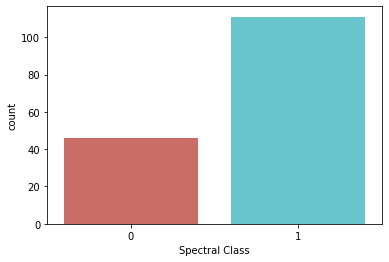

In [3]:
sns.countplot(x='Spectral Class',data=data,palette='hls')
plt.show()

## Criando as funções para a Regressão Logística

### Função sigmóide (logit)

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Função de custo

In [5]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 0.00001
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

### Gradiente descendente

In [6]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

### Função de predição
    Maior que 0.5 é arredondada p/ 1, menor p/ 0.

In [7]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

## Gera dados fake pra testar se tudo beleza
curiosamente, estava sim

In [8]:
#X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
#                             n_clusters_per_class=1, random_state=14)
#
#y = y[:,np.newaxis]
#
#data = pd.DataFrame(np.hstack((y, X)))
#
#data = data.rename(columns={0:'col0', 1:'col1', 2:'col2'})
#
#data

## Selecionando cols, normalizando e removendo NaNs
    papel importante a ser feito

In [9]:
cols = {
    'y' : 'Spectral Class',
    'x_1' : 'Temperature (K)',
    'x_2' : 'Radius(R/Ro)'
}

# reduz a base para as colunas que serão utilizadas
data = data[[cols['y'], cols['x_1'], cols['x_2'] ]]

# normaliza as colunas numéricas
data[[cols['x_1']]] = data[[cols['x_1']]]/data[[cols['x_1']]].mean()
data[[cols['x_2']]] = data[[cols['x_2']]]/data[[cols['x_2']]].mean()

# remove os dados nulos
data = data.dropna()

data

C:\Users\Conda\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Spectral Class,Temperature (K),Radius(R/Ro)
0,1,0.381680,0.000672
1,1,0.378445,0.000610
2,1,0.323457,0.000403
3,1,0.348339,0.000633
4,1,0.241225,0.000407
...,...,...,...
217,0,2.413490,0.023849
218,0,2.132331,0.022358
230,0,3.003800,5.908954
233,0,3.450917,4.951814


## Transformando os dados
    pd.core.series.Series em np.ndarray

In [10]:
y = data[cols['y']].to_numpy(dtype ='int')
y = y[:,np.newaxis] #transforma y em um vetor coluna

X_1 = data[cols['x_1']].to_numpy(dtype ='float')
X_1 = np.vstack((X_1)) #transforma x_1 em vec coluna

X_2 = data[cols['x_2']].to_numpy(dtype ='float')
X_2 = np.vstack((X_2)) #transforma x_2 em vec coluna

X = np.hstack((X_1,X_2))
X # final result

array([[3.81679728e-01, 6.72370914e-04],
       [3.78445154e-01, 6.09879970e-04],
       [3.23457397e-01, 4.03422548e-04],
       [3.48338735e-01, 6.32819684e-04],
       [2.41224574e-01, 4.07377671e-04],
       [3.53315002e-01, 4.35063533e-04],
       [3.28060444e-01, 5.02300624e-04],
       [3.23457397e-01, 3.79691810e-04],
       [3.29677731e-01, 4.35063533e-04],
       [3.35898066e-01, 5.14165993e-04],
       [4.47864088e-01, 2.01711274e-03],
       [3.89268536e-01, 1.48752177e-03],
       [3.89890570e-01, 7.75204113e-04],
       [4.51347475e-01, 1.55436335e-03],
       [3.29677731e-01, 5.53717223e-04],
       [4.15518348e-01, 9.49229526e-04],
       [3.48214328e-01, 6.32819684e-04],
       [4.59309503e-01, 1.85890782e-03],
       [3.97106158e-01, 7.77972699e-04],
       [4.28083424e-01, 1.38824818e-03],
       [3.11016728e+00, 3.32230334e-05],
       [2.05271040e+00, 5.53717223e-05],
       [3.73220073e+00, 2.49172750e-02],
       [1.90043661e+00, 2.84768858e-02],
       [1.206744

Text(0, 0.5, 'Radius(R/Ro)')

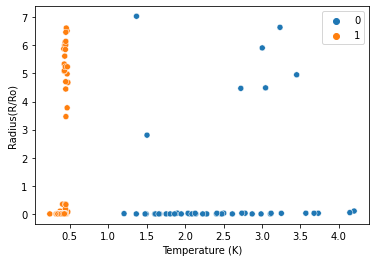

In [11]:
sns.scatterplot(x = X[:,0], y = X[:,1], hue = y.reshape(-1));

# legendas
plt.xlabel(cols['x_1'].replace("_", " ").title())
plt.ylabel(cols['x_2'].replace("_", " ").title())

Initial Cost is: [[0.69312718]] 

[[ 10.17531839]
 [-10.32019082]
 [  0.0968448 ]]


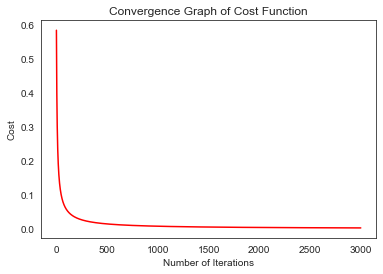

In [12]:

m = len(y)

X_new = np.hstack((np.ones((m,1)),X))
n = np.size(X_new,1)
params = np.zeros((n,1))

iterations = 3000
learning_rate = 1

initial_cost = compute_cost(X_new, y, params)
print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X_new, y, params, learning_rate, iterations)

y_pred = predict(X_new, params_optimal)
score = float(sum(y_pred == y))/ float(len(y))

print(params_optimal)

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [13]:

y_pred = predict(X_new, params_optimal)
score = float(sum(y_pred == y))/ float(len(y))

print(score)

1.0


Text(0, 0.5, 'Radius(R/Ro)')

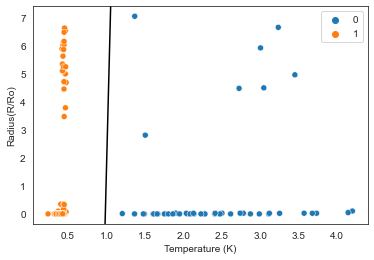

In [14]:
slope = -(params_optimal[1] / params_optimal[2])
intercept = -(params_optimal[0] / params_optimal[2])

sns.set_style('white')
sns.scatterplot(x = X_new[:,1], y= X_new[:,2], hue=y.reshape(-1));

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k");

# legendas
plt.xlabel(cols['x_1'].replace("_", " ").title())
plt.ylabel(cols['x_2'].replace("_", " ").title())